# Assignment 2 - Online Shoppers Purchasing Intention Dataset Data Set

### The goal is to predict if an online visitor will make a purchase on an e-commerce website or not.

### Setting

In [48]:
# Python libraries
import pandas as pd
import matplotlib as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [2]:
# display all the plots
%matplotlib inline

In [3]:
# Additional configuration
import warnings
warnings.filterwarnings('ignore')

## Data Retrieval

In [4]:
#import data from the online_shoppers_intention.csv file 
online_shoppers = 'online_shoppers_intention.csv'
online_shoppers  = pd.read_csv(online_shoppers, sep = ',', decimal='.', header=0) # select 0th row as a header

In [5]:
online_shoppers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [6]:
#check the datatype
online_shoppers.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
#check how many rows and columns in the original .csv file
online_shoppers.shape

(12330, 18)

### Copy the online_shoppers dataset to fake_online_shoppers

In [8]:
#copy the primary dataset
fake_online_shoppers = online_shoppers.copy()

In [9]:
fake_online_shoppers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## High-level explanation

#### Training data

| Feature | Description | Type|
| :- | :- | :- |
| Administrative | The number of Administrative pages that the user visited.| Numerical |
| Administrative_Duration | Total time spent on Administrative pages. | Numerical  |
| Informational| The number of Informational pages that the user visited. | Numerical |
| Informational_Duration | Total time spent on Informational pages. | Numerical |
| ProductRelated | The number of ProductRelated pages that the user visited. | Numerical |
| ProductRelated_Duration | Total time spent on ProductRelated pages. | Numerical |
| BounceRates | An average bounce rate of the pages visited by the user | Numerical |
| ExitRates | An average exit rate of the pages visited by the user.  | Numerical |
| PageValues | An average value for a web page that a user visited before completing an e-commerce transaction | Numerical |
| SpecialDay | The closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day)| Numerical |
| Month	|  The month the pageview occurred | Categorical |
| OperatingSystems	| Which operating system the visitor used. | Categorical |
| Browser	| Which browser the visitor used. | Categoricall |
| Region	| Which region the visitor came from. | Categorical |
| TrafficType	| What type of traffic the user is categorized into | Categorical |

#### Target Variable

| Feature | Description | Type|
| :- | :- | :- |
| Revenue | Whether or not the online user make a purchase.(True/False) | Boolean |

## Data Cleaning and Preparation

### Check for redundant white space

#### All the column with string values does not have redundant white space. Therefore, no need to use the strip function to eliminate white space

#### For the numerical column, since we're dealing with values that aren't strings, it's unnecessary to verify for mistakes such as whitespace or capitalization discrepancies.

In [10]:
#check value counts to make sure that there is no data entry error
fake_online_shoppers['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [11]:
#check value counts to make sure that there is no data entry error
fake_online_shoppers['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [12]:
# found that length equal to 12330 as expected. Hence, no white space
fake_online_shoppers['VisitorType'].value_counts().sum()

12330

In [13]:
#check value counts to make sure that there is no data entry error
fake_online_shoppers['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [14]:
# found that length equal to 12330 as expected. Hence, no white space
fake_online_shoppers['Weekend'].value_counts().sum()

12330

In [15]:
#check value counts to make sure that there is no data entry error
fake_online_shoppers['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [16]:
# found that length equal to 12330 as expected. Hence, no white space
fake_online_shoppers['Revenue'].value_counts().sum()

12330

### Detecting NaN value

In [17]:
fake_online_shoppers.isnull().values.any()

False

In [18]:
fake_online_shoppers.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Hence, there is no missing value in the dataset. We do not need to drop the row or impute with 0 or means.

### Get to know the data

In [19]:
fake_online_shoppers.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Outliers

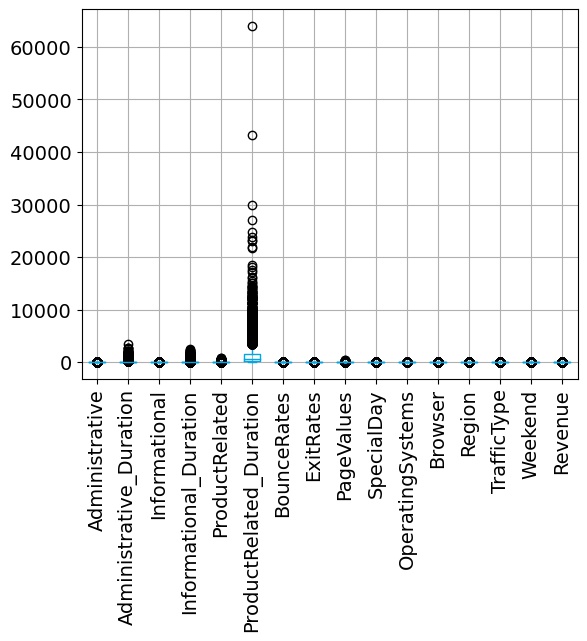

In [20]:
boxes = fake_online_shoppers.boxplot(return_type='axes', grid=True, rot=90, fontsize=14, color = '#00a7e4')

#### You can notice outlier in Productrelated_Duration. This make sense because sometimes people ....Hence, we will delete the outlier to make the data more relaiable and truly represent nor mal behavior of online shoppers.

In [21]:
# Find outliers
fake_online_shoppers['ProductRelated_Duration'].nlargest(15)

8071     63973.52223
5152     43171.23338
9238     29970.46597
8784     27009.85943
8308     24844.15620
7662     23888.81000
6684     23342.08205
6165     23050.10414
5916     21857.04648
8972     21672.24425
10318    18504.12621
6066     18171.79454
8557     17550.58486
9901     17086.23424
11130    16138.29080
Name: ProductRelated_Duration, dtype: float64

In [22]:
# We can see that row 5152 and 6684 contains outliers. we will delete these 2 rows from the dataframe.

In [23]:
fake_online_shoppers = fake_online_shoppers.drop([8071,5152])

In [24]:
# Outliers no longer exist
fake_online_shoppers['ProductRelated_Duration'].nlargest(5)

9238    29970.46597
8784    27009.85943
8308    24844.15620
7662    23888.81000
6684    23342.08205
Name: ProductRelated_Duration, dtype: float64

<AxesSubplot:>

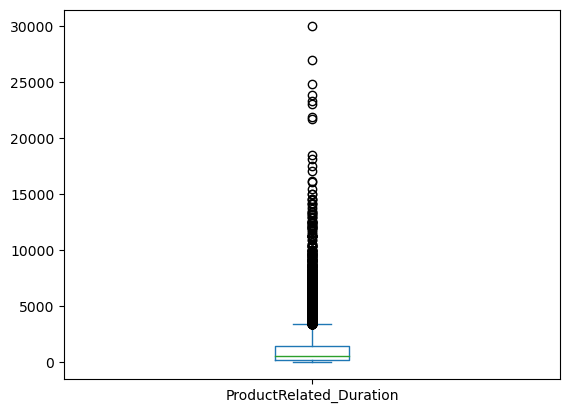

In [25]:
# ProductRelated_Duration's Boxplot after deleting outliers
fake_online_shoppers['ProductRelated_Duration'].plot(kind='box')

### Impossible Value Sanity Check - Duration Value

In [26]:
### Duration Value Sanity Check - Duration cannot be negative since time spent cannot be negative
fake_online_shoppers['Administrative_Duration'].min()

0.0

In [27]:
fake_online_shoppers['Informational_Duration'].min()

0.0

In [28]:
fake_online_shoppers['ProductRelated_Duration'].min()

0.0

In [29]:
# Dataframe shape after data cleaning and preparation

In [30]:
fake_online_shoppers.shape

(12328, 18)

In [31]:
fake_online_shoppers = fake_online_shoppers.applymap(lambda x: 1 if x == True else x)
fake_online_shoppers = fake_online_shoppers.applymap(lambda x: 0 if x == False else x)

In [32]:
fake_online_shoppers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


## Data exploration

In [33]:
#Describe the dataset
fake_online_shoppers.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328.000000,12328,12328.000000,12328.000000,12328.000000,12328.000000,12328,12328.000000,12328.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3363,NaN,NaN,NaN,NaN,10549,NaN,NaN
mean,2.313757,80.342753,0.501217,34.104872,31.643008,1186.248875,0.022195,0.043076,5.890151,0.061437,NaN,2.124027,2.357154,3.147713,4.068949,NaN,0.232560,0.15477
std,3.319331,172.730396,1.251526,137.734064,43.903153,1788.852391,0.048492,0.048600,18.569810,0.198932,NaN,0.911397,1.717410,2.401630,4.024459,NaN,0.422481,0.36170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.075000,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,0.000000,0.00000
50%,1.000000,7.312500,0.000000,0.000000,18.000000,598.828571,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,0.000000,0.00000
75%,4.000000,93.111250,0.000000,0.000000,38.000000,1463.850000,0.016830,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,0.000000,0.00000


#### Revenue

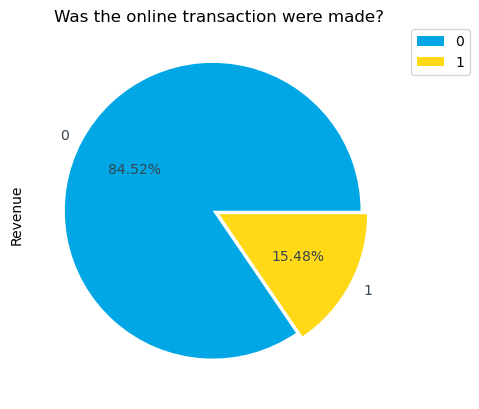

In [34]:
#Figure 1.1
#Nominal - Revenue
import matplotlib as plt
colors2 = ['#00a7e4','#ffd816']
ax = fake_online_shoppers['Revenue'].value_counts().plot(kind='pie',explode=[0.05, 0],autopct='%1.2f%%', textprops={'color':'#36454F','fontsize': 10}, colors = colors2,
                                title='Was the online transaction were made?')
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

#### We can see that only 15.48 % of the purchase was made, Which make sense since most of the time people will search the product that they interested before making a purchase. This also implies that the data are imbalanced.

In [35]:
Revenue_true= fake_online_shoppers.loc[fake_online_shoppers['Revenue']==True]

In [36]:
Revenue_true

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.00,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,0,1
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,0,1
101,4,61.000000,0,0.00,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,1,1
188,9,111.500000,1,48.50,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,0,1
196,2,56.000000,1,144.00,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6,133.466667,0,0.00,44,2664.445833,0.002041,0.010884,97.860836,0.0,Nov,2,2,1,3,Returning_Visitor,1,1
12276,7,139.575000,0,0.00,30,986.500000,0.000000,0.011429,36.392861,0.0,Dec,2,10,1,2,New_Visitor,0,1
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,0,1
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,1,1


In [110]:
fake_online_shoppers['Revenue'].value_counts()

0    10420
1     1908
Name: Revenue, dtype: int64

#### Month

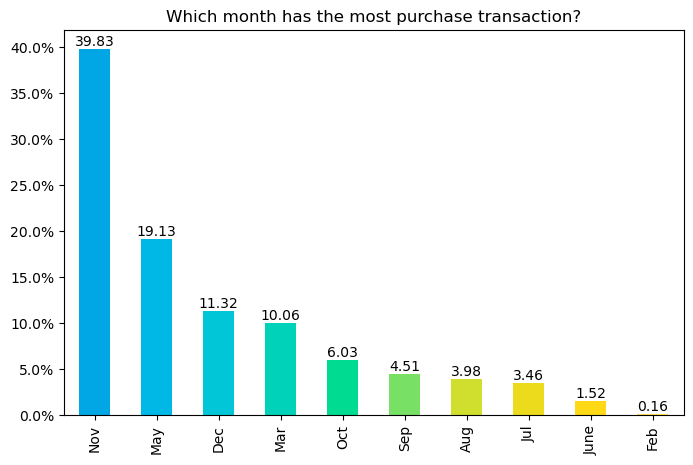

In [37]:
import matplotlib as plt
import matplotlib.ticker as mtick

#Figure2.1.2.1: a bar chart of percentage of primary students with internet access at home, by country income group
ax_bar = Revenue_true['Month'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar',color=['#00a7e4','#00b8e5','#00c6d7','#00d2b9','#00db92','#77e065','#d0de2d','#ecdb1d','#ffd816','#ffe050'], title ="Which month has the most purchase transaction?",figsize=(8, 5), fontsize=10)

                                                                                                            
for container in ax_bar.containers:
    ax_bar.bar_label(container)
    ax_bar.yaxis.set_major_formatter(mtick.PercentFormatter())

#### Among completed purchase transactions, November emerges as the top month for online shopping, followed by May and December. These months witnessed significant spending by online shoppers. Now, our interest lies in determining whether these purchases were made on special days.

#### Please note that only 10 months are presented in the dataset. Since the data were collected in 1-year period of time,I assumed that the data for the other two months, including April and Jan, were missing.

#### SpecialDay

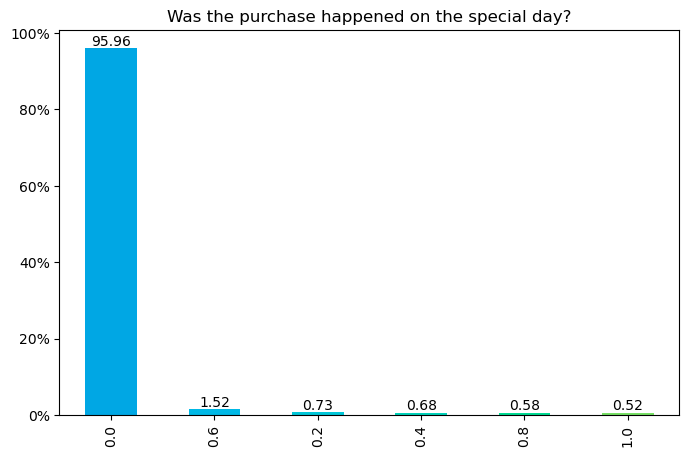

In [38]:
import matplotlib as plt
import matplotlib.ticker as mtick

ax_bar = Revenue_true['SpecialDay'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar',color=['#00a7e4','#00b8e5','#00c6d7','#00d2b9','#00db92','#77e065','#d0de2d','#ecdb1d','#ffd816','#ffe050'], title ="Was the purchase happened on the special day?",figsize=(8, 5), fontsize=10)
                                                                                                            
for container in ax_bar.containers:
    ax_bar.bar_label(container)
    ax_bar.yaxis.set_major_formatter(mtick.PercentFormatter())

#### Based on the bar chart, the majority of purchases (96.96%) were not made on special days. Our next question is whether these purchases were made on weekends

####  Weekend

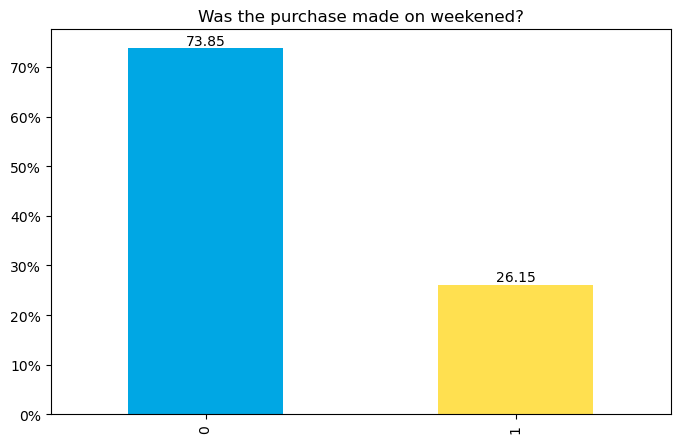

In [39]:
ax_bar = Revenue_true['Weekend'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar',color=['#00a7e4','#ffe050'], title ="Was the purchase made on weekened?",figsize=(8, 5), fontsize=10)
                                                                                                            
for container in ax_bar.containers:
    ax_bar.bar_label(container)
    ax_bar.yaxis.set_major_formatter(mtick.PercentFormatter())

#### According to the findings, the majority of purchase transactions (73.85%) did not occur on weekends.

####  Browser

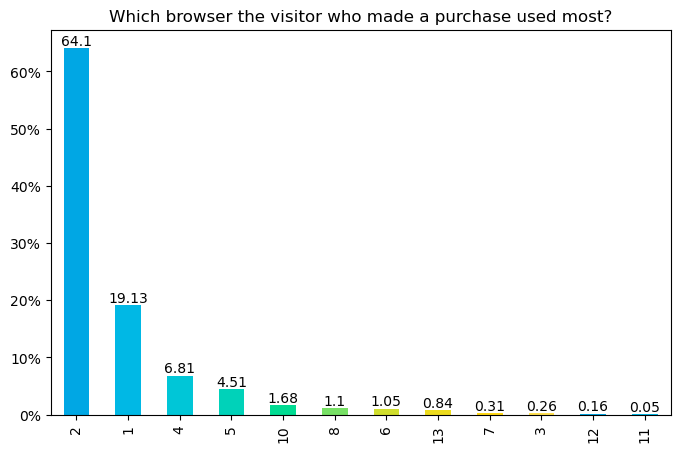

In [40]:
ax_bar = Revenue_true['Browser'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar',color=['#00a7e4','#00b8e5','#00c6d7','#00d2b9','#00db92','#77e065','#d0de2d','#ecdb1d','#ffd816','#ffe050'], title ="Which browser the visitor who made a purchase used most?",figsize=(8, 5), fontsize=10)                                                                                                            
for container in ax_bar.containers:
    ax_bar.bar_label(container)
    ax_bar.yaxis.set_major_formatter(mtick.PercentFormatter())

#### The analysis reveals that the highest percentage of purchase transactions (64.1%) was attributed to browser no.2. In comparison, browser no.1 accounted for 19.13% of the purchases, while browser no.4 constituted 8.61% of the total transactions.

####  Operating System

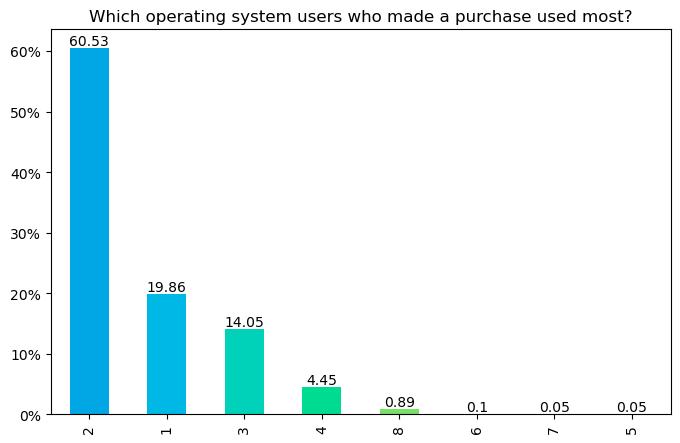

In [42]:
#Operating System

ax_bar = Revenue_true['OperatingSystems'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar',color=['#00a7e4','#00b8e5','#00d2b9','#00db92','#77e065','#d0de2d','#ffd816','#ffe050'], title ="Which operating system users who made a purchase used most?",figsize=(8, 5), fontsize=10)                                                                                                            
for container in ax_bar.containers:
    ax_bar.bar_label(container)
    ax_bar.yaxis.set_major_formatter(mtick.PercentFormatter())

#### The bar chart shows that a majority of purchasers (60.53%) favored operating system no.2, with 19.86% opting for operating system no.1 and 14.05% choosing operating system no.3.

####  VisitorType

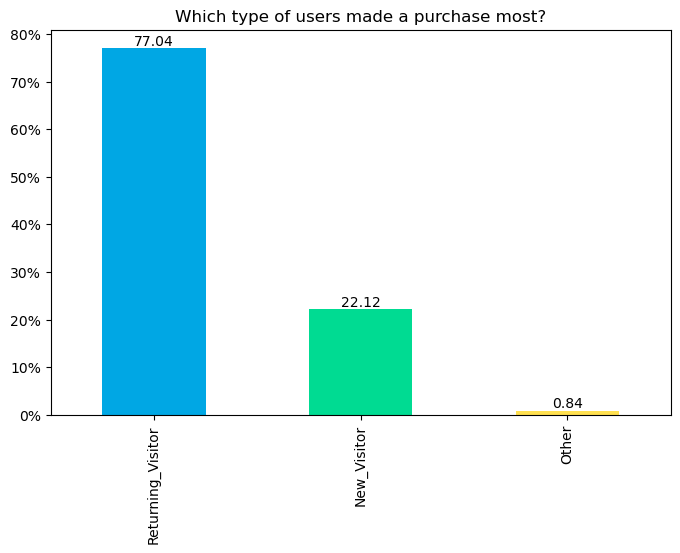

In [41]:
#Visitor Type
ax_bar = Revenue_true['VisitorType'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar',color=['#00a7e4','#00db92','#ffe050'], title ="Which type of users made a purchase most?",figsize=(8, 5), fontsize=10)                                                                                                            
for container in ax_bar.containers:
    ax_bar.bar_label(container)
    ax_bar.yaxis.set_major_formatter(mtick.PercentFormatter())

#### The analysis reveals that returning visitors accounted for the majority of purchases (77.04%), followed by new visitors (22.12%), and others (0.84%). This finding supports the hypothesis that most users do not make a purchase on their initial visit, but rather take time to research the product before making a buying decision.

####  Region

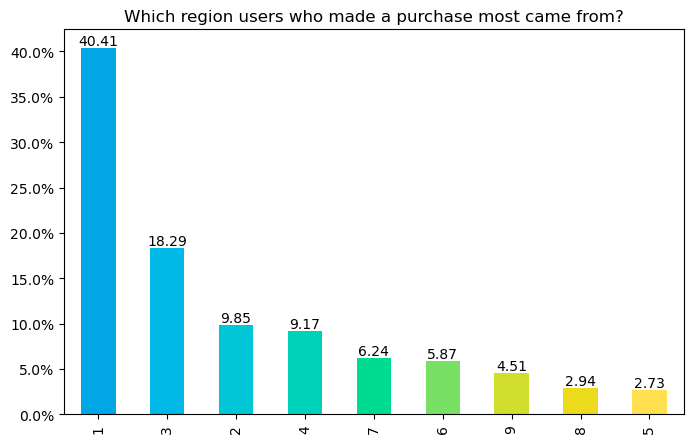

In [43]:
#Region

ax_bar = Revenue_true['Region'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar',color=['#00a7e4','#00b8e5','#00c6d7','#00d2b9','#00db92','#77e065','#d0de2d','#ecdb1d','#ffe050'], title ="Which region users who made a purchase most came from?",figsize=(8, 5), fontsize=10)                                                                                                            
for container in ax_bar.containers:
    ax_bar.bar_label(container)
    ax_bar.yaxis.set_major_formatter(mtick.PercentFormatter())

#### The majority of purchasers (40.41%) were from region no.1, while region no.3 accounted for 18.29% of the purchasers, and region no.2 comprised 9.85% of the total.

### Page Value

In [44]:
fake_online_shoppers["PageValues"].describe()

count    12328.000000
mean         5.890151
std         18.569810
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

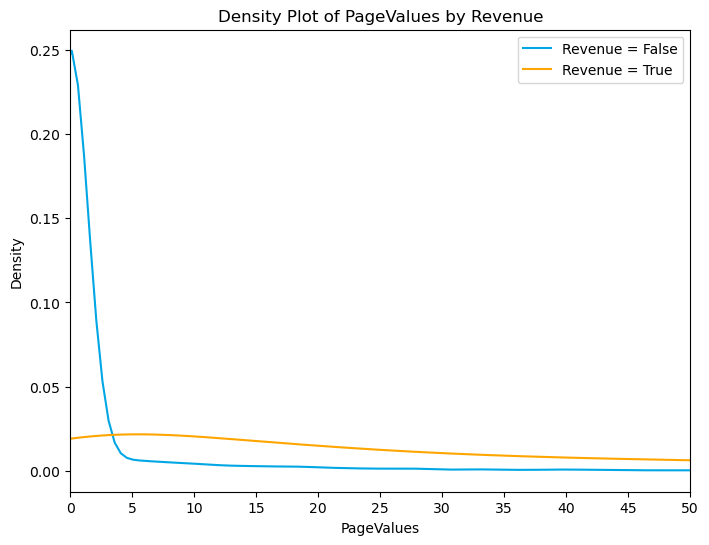

In [114]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

fake_online_shoppers['PageValues'][fake_online_shoppers['Revenue'] == 0].plot(kind='density', label='Revenue = False', color='#00a7e4')
fake_online_shoppers['PageValues'][fake_online_shoppers['Revenue'] == 1].plot(kind='density', label='Revenue = True', color='orange')

ax.set_xlim(0, 50) # Set the x-axis limit to start from 0 and end at 50
ax.set_xticks(range(0, 51, 5)) # Set x-axis ticks at every 5 units

ax.legend()

plt.xlabel('PageValues')
plt.ylabel('Density')
plt.title('Density Plot of PageValues by Revenue')

plt.show()

#### We can see that the distribution of page values in the data is highly skewed towards the right. This means that a large number of observations have a page value of 0 dollars or a very low value, while only a few observations have extremely high page values.

#### On average, the observed page values amount to around 6 dollars ($5.89).

#### Hypothesis: Higher page values lead to higher revenue. 

#### Explanation: The positive correlation (0.492560) between PageValues and Revenue suggests that as the page values increase, the revenue is also likely to increase. This implies that engaging and valuable content on web pages may attract more customers and result in higher revenue.

## Explore Relationship

### Correlation Heatmap

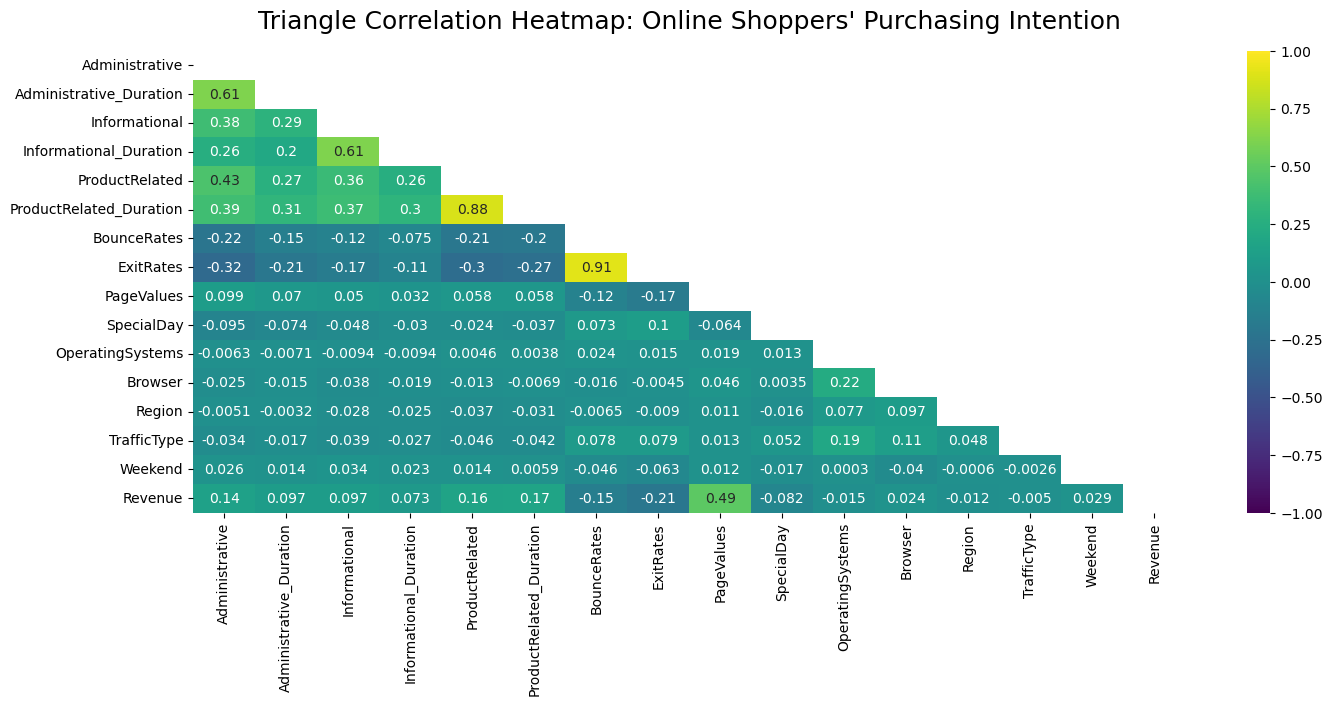

In [49]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(fake_online_shoppers.corr(), dtype=np.bool))
heatmap = sns.heatmap(fake_online_shoppers.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Triangle Correlation Heatmap: Online Shoppers\' Purchasing Intention', fontdict={'fontsize':18}, pad=16);

#### From the heatmap, higher page values, longer durations on product-related pages, and more visits to administrative and informational pages tend to be associated with higher revenue. On the other hand, higher bounce rates and exit rates are linked to lower revenue. It's important to remember that correlation does not imply causation, and further analysis is needed to determine the underlying factors influencing revenue

In [50]:
corr_matrix = fake_online_shoppers.corr()
corr_matrix.sort_values(by="Revenue", ascending=False, inplace=True)
corr_matrix["Revenue"]

Revenue                    1.000000
PageValues                 0.492560
ProductRelated_Duration    0.165053
ProductRelated             0.161482
Administrative             0.139215
Informational              0.097431
Administrative_Duration    0.096968
Informational_Duration     0.073033
Weekend                    0.029344
Browser                    0.023970
TrafficType               -0.005047
Region                    -0.011658
OperatingSystems          -0.014677
SpecialDay                -0.082328
BounceRates               -0.150705
ExitRates                 -0.207108
Name: Revenue, dtype: float64

#### PageValues and Revenue

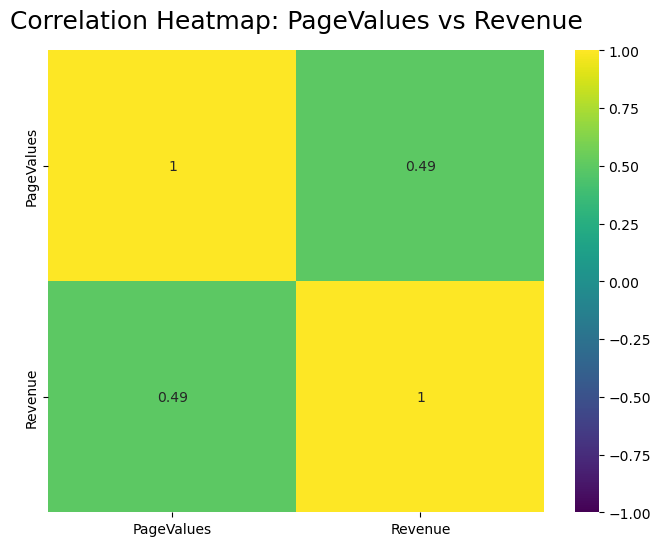

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Select the two columns to include in the heatmap
columns = ['PageValues', 'Revenue']
subset = fake_online_shoppers[columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = subset.corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap: PageValues vs Revenue', fontdict={'fontsize': 18}, pad=16)

plt.show()

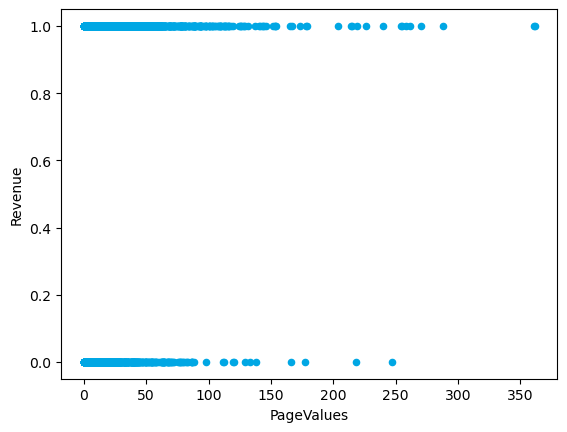

In [51]:
ax1 = fake_online_shoppers.plot.scatter(x='PageValues',y='Revenue', c='#00a7e4')

#### We can see a strong positive correlation between Revenue and PageValues with r = 0.4925. 
#### Hypothesis: the higher the PageValues, the higher the revenue.

#### Explanation: this implies that engaging and valuable content on web pages may attract more customers and result in higher revenue.

#### PageValues and ProductRelated_Duration

In [80]:
import pandas as pd

# Assuming you have a DataFrame called fake_online_shoppers
correlation = fake_online_shoppers['PageValues'].corr(fake_online_shoppers['ProductRelated_Duration'])
print("Correlation between PageValues and ProductRelated_Duration:", correlation)


Correlation between PageValues and ProductRelated_Duration: 0.05794229839723363


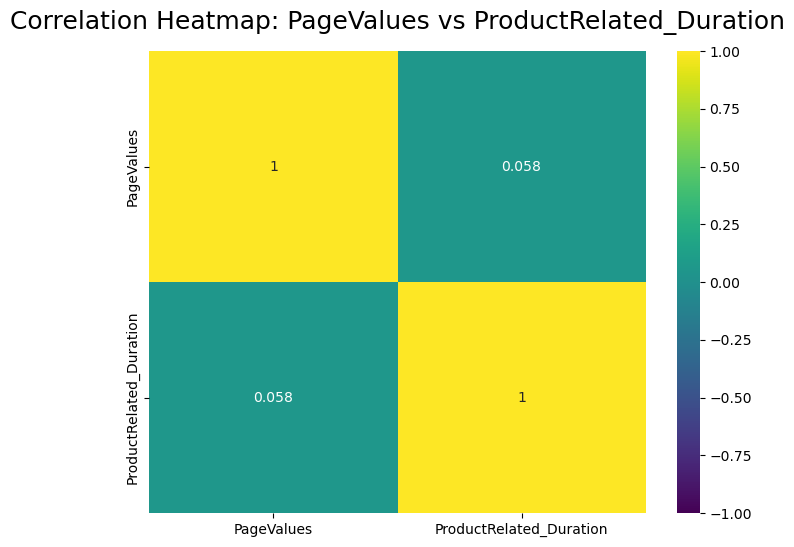

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Select the two columns to include in the heatmap
columns = ['PageValues', 'ProductRelated_Duration']
subset = fake_online_shoppers[columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = subset.corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap: PageValues vs ProductRelated_Duration', fontdict={'fontsize': 18}, pad=16)

plt.show()

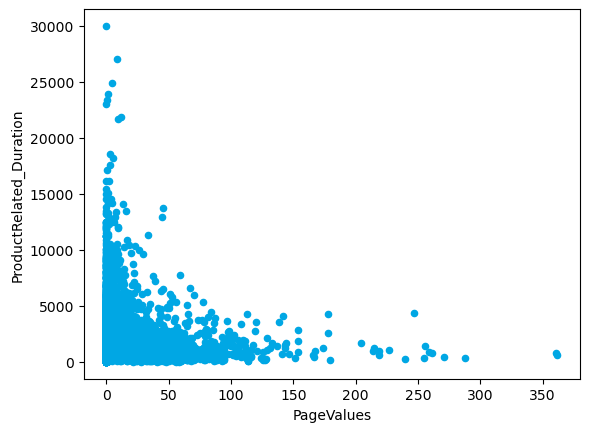

In [55]:
ax1 = fake_online_shoppers.plot.scatter(x='PageValues',y='ProductRelated_Duration', c='#00a7e4')

#### BounceRates and ExitRates 

In [52]:
corr_matrix["BounceRates"].sort_values(ascending=False)

BounceRates                1.000000
ExitRates                  0.913004
TrafficType                0.078360
SpecialDay                 0.072684
OperatingSystems           0.023815
Region                    -0.006544
Browser                   -0.015786
Weekend                   -0.046488
Informational_Duration    -0.074616
Informational             -0.117151
PageValues                -0.119408
Administrative_Duration   -0.146447
Revenue                   -0.150705
ProductRelated_Duration   -0.195497
ProductRelated            -0.206478
Administrative            -0.223592
Name: BounceRates, dtype: float64

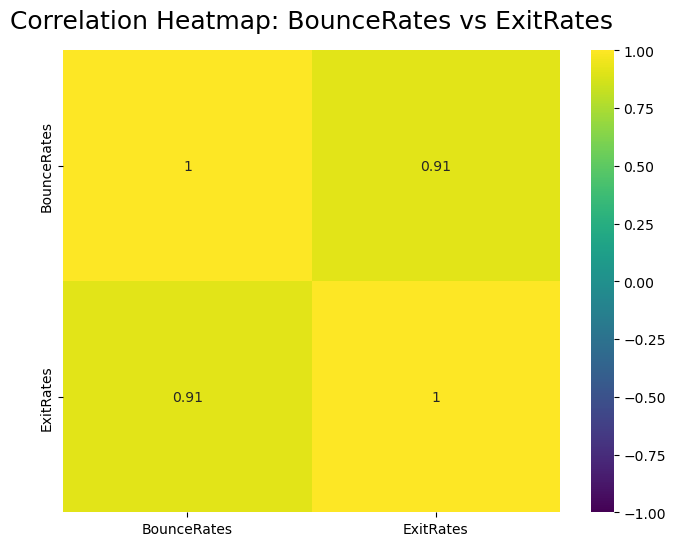

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Select the two columns to include in the heatmap
columns = ['BounceRates', 'ExitRates']
subset = fake_online_shoppers[columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = subset.corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap: BounceRates vs ExitRates', fontdict={'fontsize': 18}, pad=16)

plt.show()

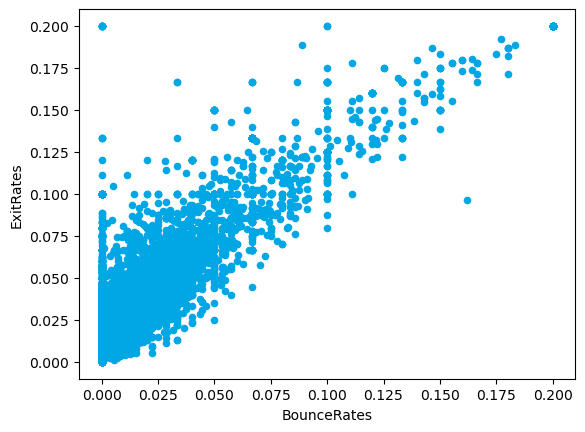

In [53]:
ax1 = fake_online_shoppers.plot.scatter(x='BounceRates',y='ExitRates', c='#00a7e4')

#### We can see a strong positive correlation between BounceRates and ExitRates with r = 0.9130. 
#### Hypothesis: the higher the BounceRates, the higher the ExitRates.

#### BounceRates and Revenue

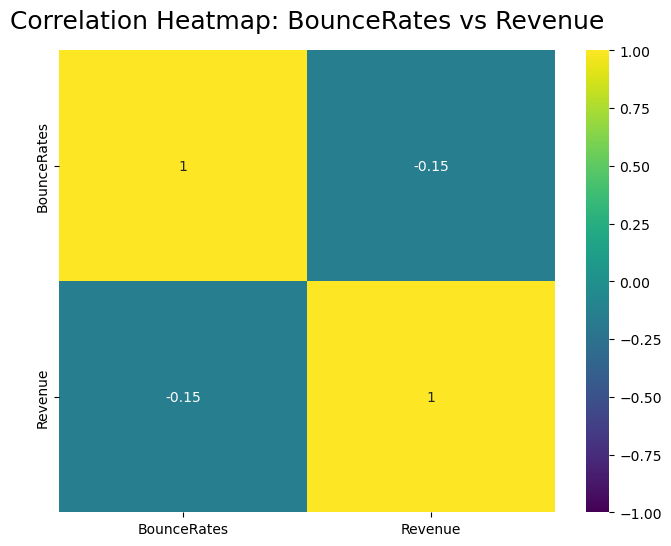

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Select the two columns to include in the heatmap
columns = ['BounceRates', 'Revenue']
subset = fake_online_shoppers[columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = subset.corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap: BounceRates vs Revenue', fontdict={'fontsize': 18}, pad=16)

plt.show()

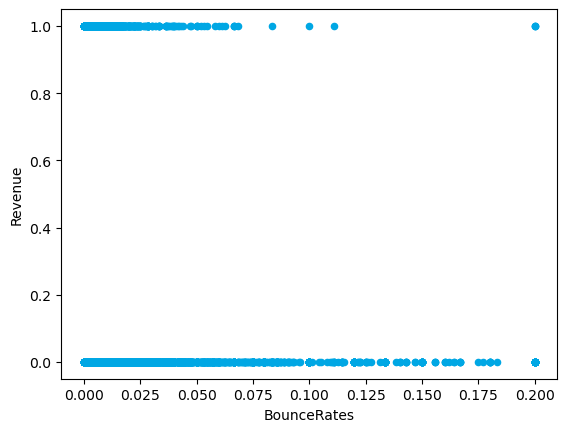

In [56]:
ax1 = fake_online_shoppers.plot.scatter(x='BounceRates',y='Revenue', c='#00a7e4')

#### ExitRates and Revenue

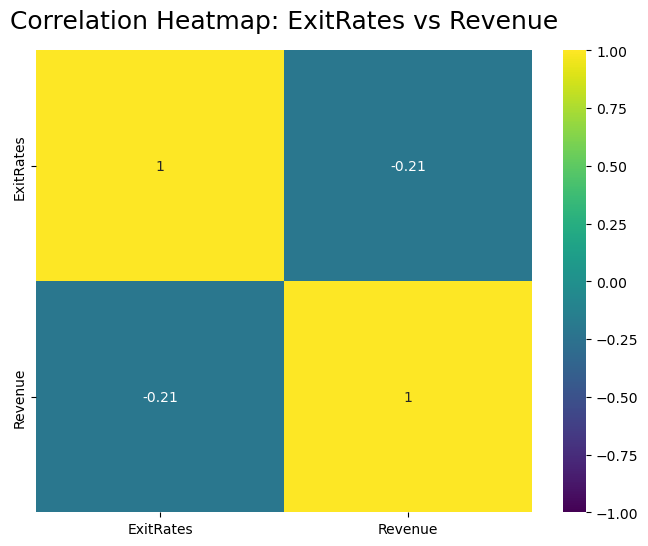

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Select the two columns to include in the heatmap
columns = ['ExitRates', 'Revenue']
subset = fake_online_shoppers[columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = subset.corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap: ExitRates vs Revenue', fontdict={'fontsize': 18}, pad=16)

plt.show()

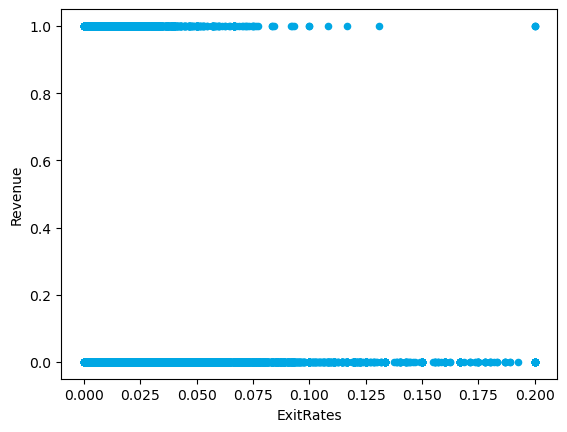

In [57]:
ax1 = fake_online_shoppers.plot.scatter(x='ExitRates',y='Revenue', c='#00a7e4')

#### ProductRelated and Revenue

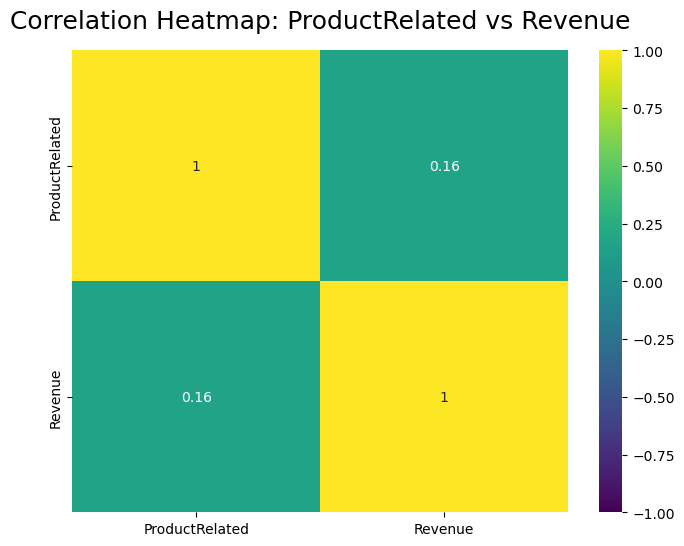

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Select the two columns to include in the heatmap
columns = ['ProductRelated', 'Revenue']
subset = fake_online_shoppers[columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = subset.corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap: ProductRelated vs Revenue', fontdict={'fontsize': 18}, pad=16)

plt.show()

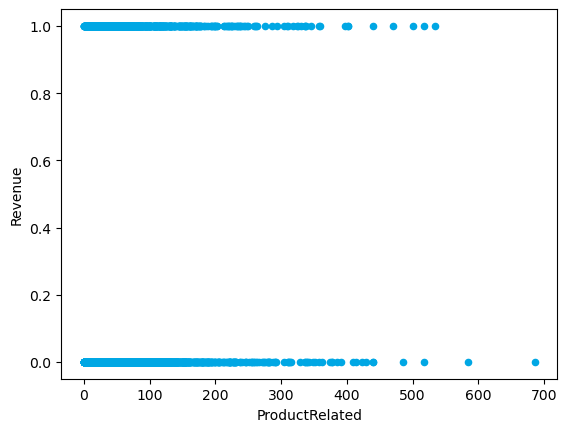

In [58]:
ax1 = fake_online_shoppers.plot.scatter(x='ProductRelated',y='Revenue', c='#00a7e4')

#### ProductRelated_Duration and Revenue

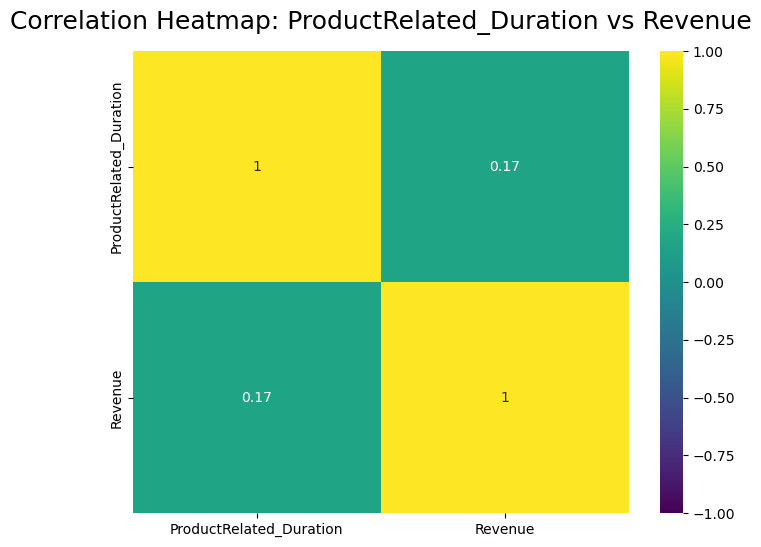

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Select the two columns to include in the heatmap
columns = ['ProductRelated_Duration', 'Revenue']
subset = fake_online_shoppers[columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = subset.corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap: ProductRelated_Duration vs Revenue', fontdict={'fontsize': 18}, pad=16)

plt.show()

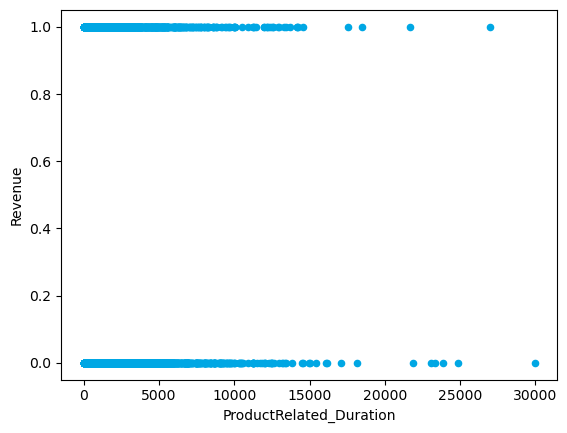

In [63]:
ax1 = fake_online_shoppers.plot.scatter(x='ProductRelated_Duration',y='Revenue', c='#00a7e4')

#### Informational_Duration and Revenue

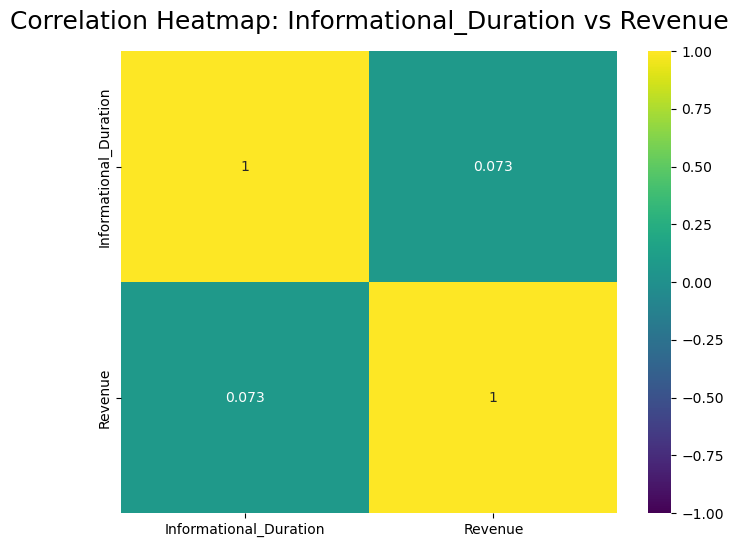

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Select the two columns to include in the heatmap
columns = ['Informational_Duration', 'Revenue']
subset = fake_online_shoppers[columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = subset.corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap: Informational_Duration vs Revenue', fontdict={'fontsize': 18}, pad=16)

plt.show()

<Figure size 1920x1440 with 0 Axes>

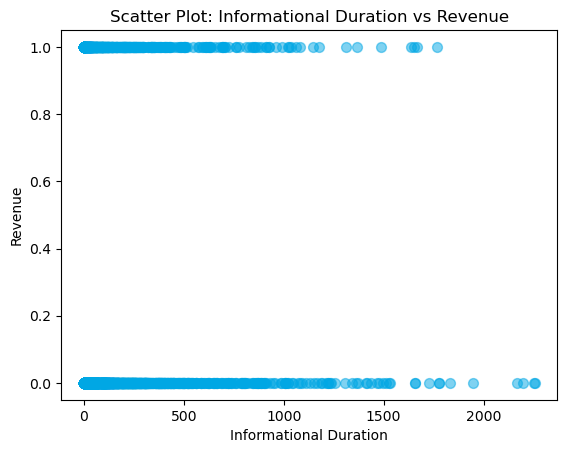

In [103]:
import matplotlib.pyplot as plt

# Increase DPI for higher quality image
plt.figure(dpi=300)

ax1 = fake_online_shoppers.plot.scatter(x='Informational_Duration', y='Revenue', c='#00a7e4', s=50, alpha=0.5)

# Set axis labels
ax1.set_xlabel('Informational Duration')
ax1.set_ylabel('Revenue')

# Set plot title
ax1.set_title('Scatter Plot: Informational Duration vs Revenue')

plt.show()


#### ProductRelated and ProductRelated_Duration

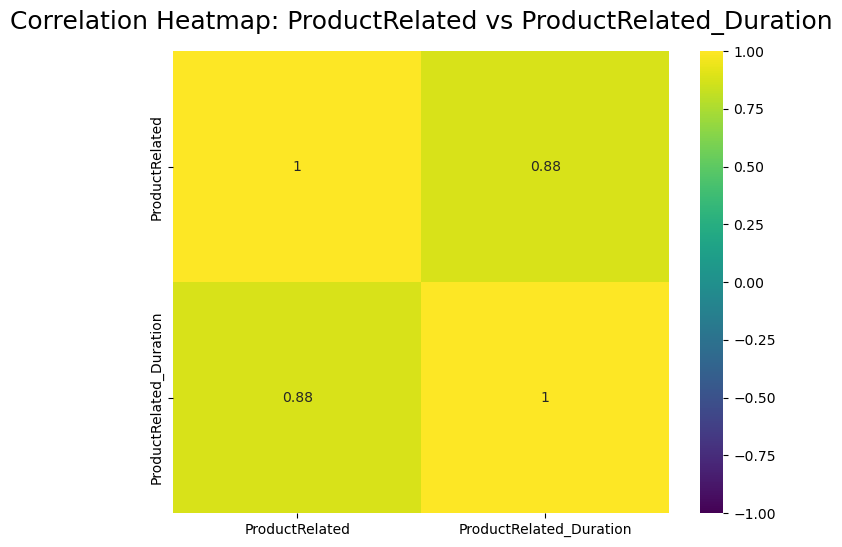

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Select the two columns to include in the heatmap
columns = ['ProductRelated', 'ProductRelated_Duration']
subset = fake_online_shoppers[columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = subset.corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap: ProductRelated vs ProductRelated_Duration', fontdict={'fontsize': 18}, pad=16)

plt.show()

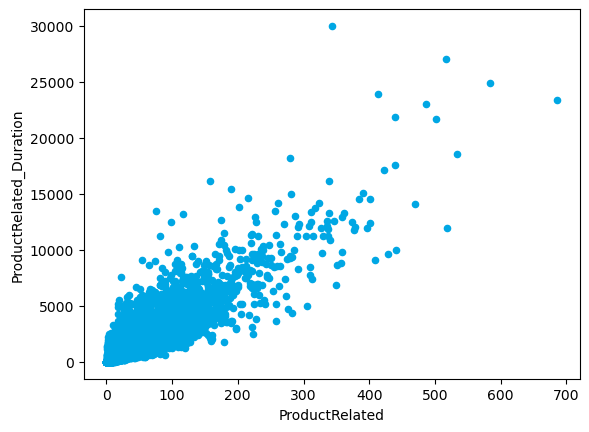

In [59]:
ax1 = fake_online_shoppers.plot.scatter(x='ProductRelated',y='ProductRelated_Duration', c='#00a7e4')

#### Informational and Informational_Duration

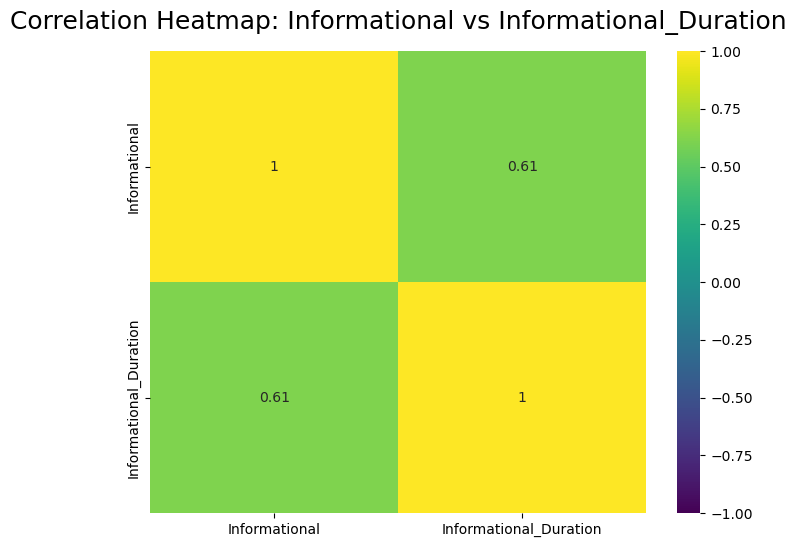

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Select the two columns to include in the heatmap
columns = ['Informational', 'Informational_Duration']
subset = fake_online_shoppers[columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = subset.corr()

# Create the heatmap
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap: Informational vs Informational_Duration', fontdict={'fontsize': 18}, pad=16)

plt.show()

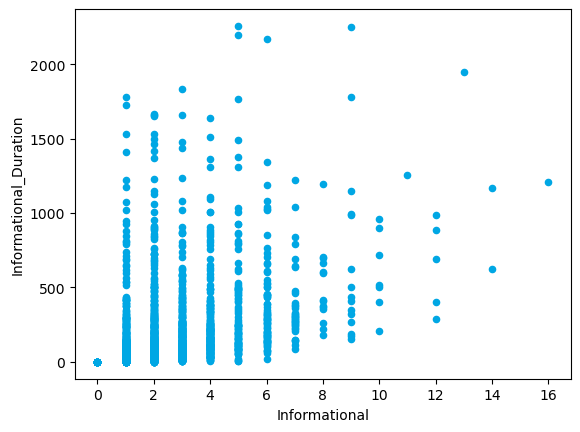

In [127]:
ax1 = fake_online_shoppers.plot.scatter(x='Informational',y='Informational_Duration', c='#00a7e4')

### Right-skewed distribution 

<function matplotlib.pyplot.show(close=None, block=None)>

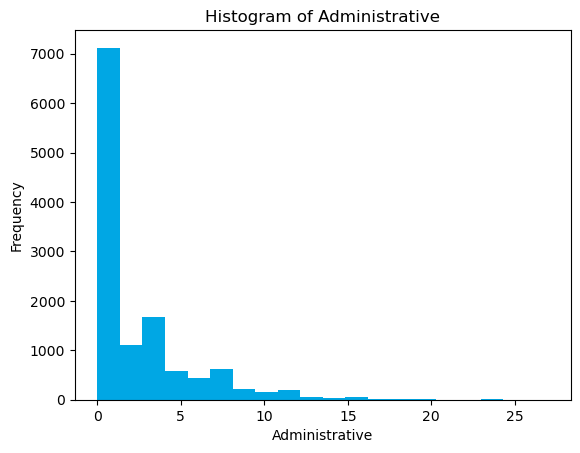

In [93]:
#draw histogram
import matplotlib.pyplot as plt
colors = ['#00a7e4']
fake_online_shoppers['Administrative'].plot(kind='hist',bins=20,color = colors)
plt.xlabel('Administrative')
plt.title('Histogram of Administrative')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

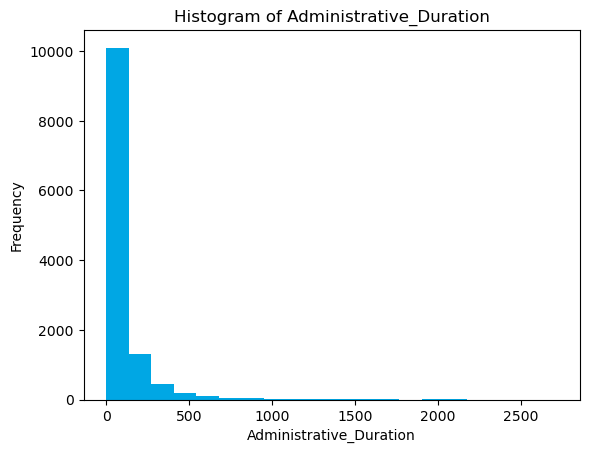

In [94]:
#draw histogram
import matplotlib.pyplot as plt
colors = ['#00a7e4']
fake_online_shoppers['Administrative_Duration'].plot(kind='hist',bins=20,color = colors)
plt.xlabel('Administrative_Duration')
plt.title('Histogram of Administrative_Duration')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

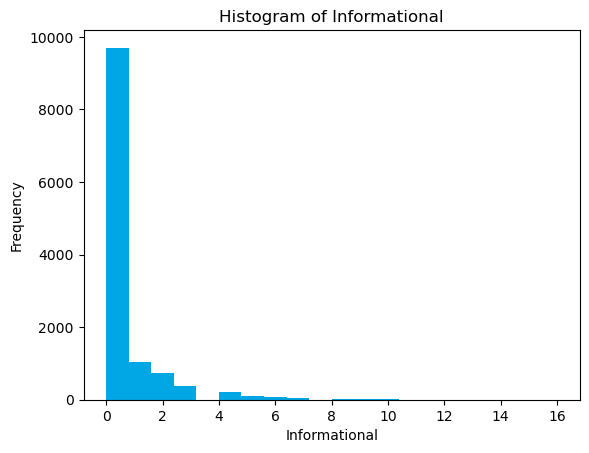

In [91]:
#draw histogram
import matplotlib.pyplot as plt
colors = ['#00a7e4']
fake_online_shoppers['Informational'].plot(kind='hist',bins=20,color = colors)
plt.xlabel('Informational')
plt.title('Histogram of Informational')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

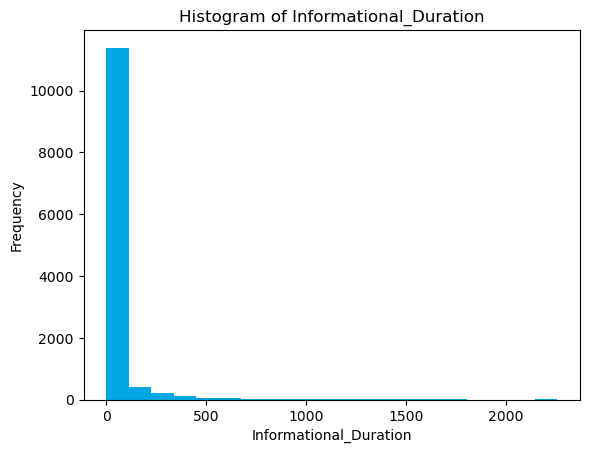

In [95]:
#draw histogram
import matplotlib.pyplot as plt
colors = ['#00a7e4']
fake_online_shoppers['Informational_Duration'].plot(kind='hist',bins=20,color = colors)
plt.xlabel('Informational_Duration')
plt.title('Histogram of Informational_Duration')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

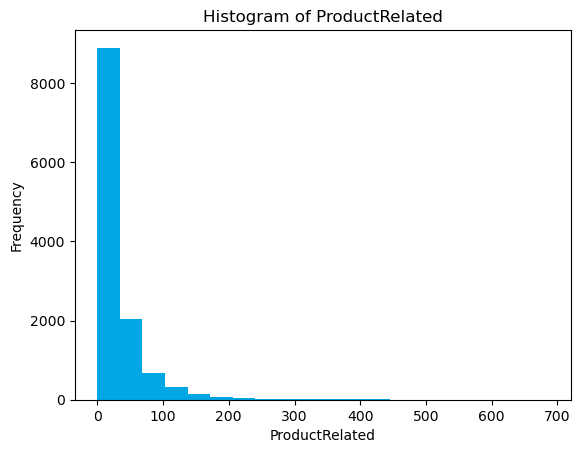

In [96]:
#draw histogram
import matplotlib.pyplot as plt
colors = ['#00a7e4']
fake_online_shoppers['ProductRelated'].plot(kind='hist',bins=20,color = colors)
plt.xlabel('ProductRelated')
plt.title('Histogram of ProductRelated')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

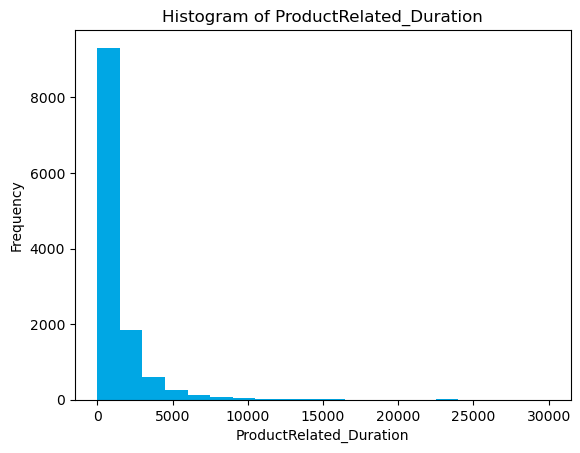

In [97]:
#draw histogram
import matplotlib.pyplot as plt
colors = ['#00a7e4']
fake_online_shoppers['ProductRelated_Duration'].plot(kind='hist',bins=20,color = colors)
plt.xlabel('ProductRelated_Duration')
plt.title('Histogram of ProductRelated_Duration')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

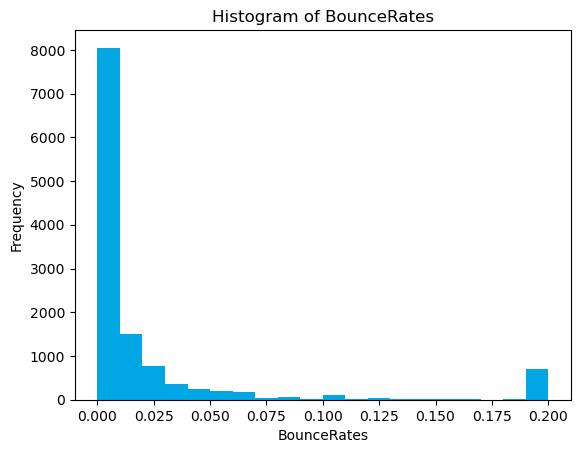

In [104]:
#draw histogram
import matplotlib.pyplot as plt
colors = ['#00a7e4']
fake_online_shoppers['BounceRates'].plot(kind='hist',bins=20,color = colors)
plt.xlabel('BounceRates')
plt.title('Histogram of BounceRates')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

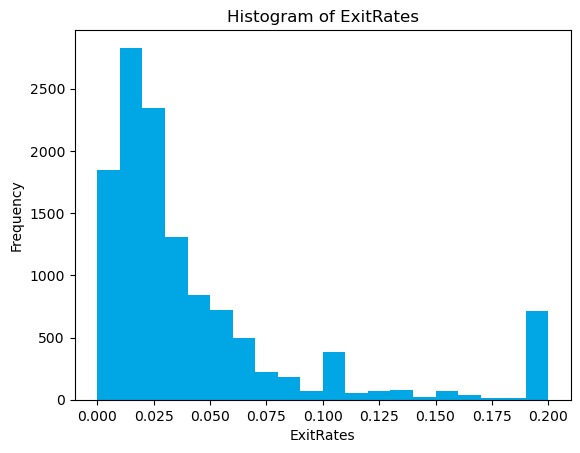

In [106]:
#draw histogram
import matplotlib.pyplot as plt
colors = ['#00a7e4']
fake_online_shoppers['ExitRates'].plot(kind='hist',bins=20,color = colors)
plt.xlabel('ExitRates')
plt.title('Histogram of ExitRates')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

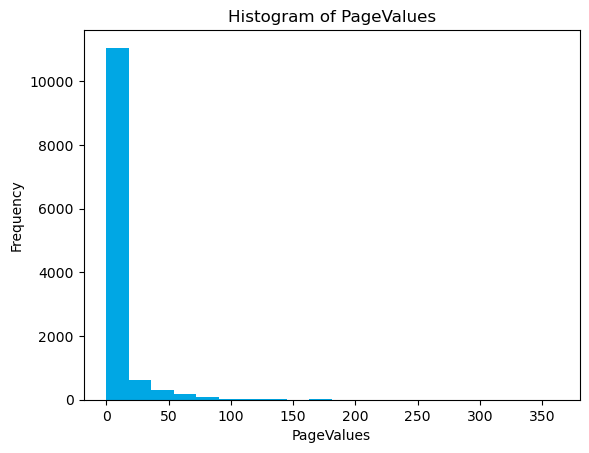

In [107]:
#draw histogram
import matplotlib.pyplot as plt
colors = ['#00a7e4']
fake_online_shoppers['PageValues'].plot(kind='hist',bins=20,color = colors)
plt.xlabel('PageValues')
plt.title('Histogram of PageValues')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

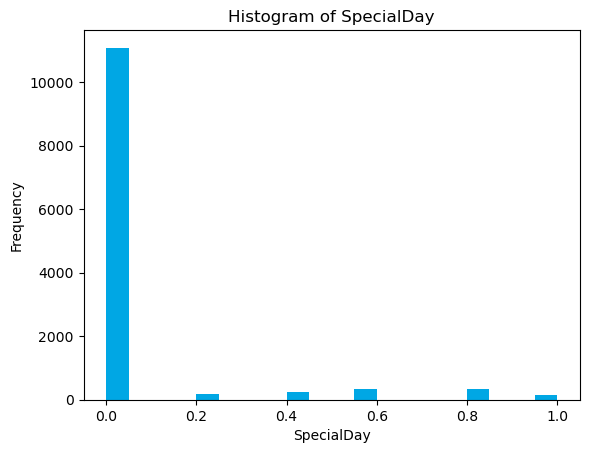

In [108]:
#draw histogram
import matplotlib.pyplot as plt
colors = ['#00a7e4']
fake_online_shoppers['SpecialDay'].plot(kind='hist',bins=20,color = colors)
plt.xlabel('SpecialDay')
plt.title('Histogram of SpecialDay')
plt.show


## Feature Selection

In [ ]:
# fake_online_shoppers.pivot(columns='Revenue').Administrative.plot(kind = 'hist', stacked=True)
# fake_online_shoppers.pivot(columns='Revenue').Administrative.plot(kind = 'hist', stacked=True)



In [ ]:
fake_online_shoppers

### Encoding Categorical Data

#### As most machine learning models exclusively handle numerical variables, it becomes crucial to preprocess categorical variables. It is necessary to transform these categorical variables into numerical representations so that the model can comprehend and extract meaningful insights from them.

In [ ]:
#column_trans = make_column_transformer((OneHotEncoder(),['Month','OperatingSystems','Browser','VisitorType','Weekend']),remainder='passthrough')


In [ ]:
# import pandas as pd
# categorical_feature = pd.Series([])

In [ ]:
# fake_online_shoppers['Revenue'] == 'TRUE'
# (fake_online_shoppers['Revenue'] == 'TRUE').astype(int)
# fake_online_shoppers['Revenue'] = (fake_online_shoppers['Revenue'] == 'TRUE').astype(int)

In [ ]:
fake_online_shoppers[["Revenue"]] *= 1

In [ ]:
revenue_true = fake_online_shoppers.loc[fake_online_shoppers['Revenue']==1]

In [ ]:
revenue_false = fake_online_shoppers.loc[fake_online_shoppers['Revenue']==0]

In [ ]:
fake_online_shoppers

In [ ]:
fake_online_shoppers.head()

In [ ]:
fake_online_shoppers.tail()

In [ ]:
#check value counts
fake_online_shoppers['Revenue'].value_counts()

In [130]:
dummies = ['Region','Browser','TrafficType','VisitorType','Month','OperatingSystems']
shoppers_dummies = pd.get_dummies(shoppers_boxcox, columns = dummies, drop_first=True)

NameError: name 'shoppers_boxcox' is not defined

## Data Modeling

### Training Data
#### - Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend

### Target Variable
#### - Revenue

In [ ]:
Revenue = fake_online_shoppers['Revenue']

### Model 1: K-Nearest Neightbour Classifier

### Generating Train/Test Set

In [132]:
from sklearn.model_selection import train_test_split

# Assuming your data is stored in features (X) and target (y) variables
X = fake_online_shoppers.drop("Revenue", axis=1)  # Features (input variables)
y = fake_online_shoppers["Revenue"]  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assuming your dataset is named "fake_online_shoppers"

# Select the features and target variable
features = fake_online_shoppers.drop('Revenue', axis=1)
target = fake_online_shoppers['Revenue']

# Columns to encode
columns_to_encode = ['Region', 'Browser', 'TrafficType', 'VisitorType', 'Month', 'OperatingSystems']

# Perform one-hot encoding on the categorical variables
features_encoded = pd.get_dummies(features, columns=columns_to_encode)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Create an instance of KNeighborsClassifier with 5 neighbors
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Print the predictions
print(y_pred)



[0 0 0 ... 0 0 0]


In [144]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
y_pred.shape

(2466,)

In [146]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)


[[1999   70]
 [ 274  123]]


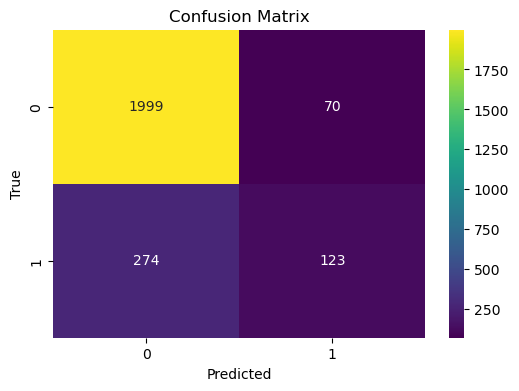

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Create a heatmap of the confusion matrix with 'viridis' colormap
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', ax=ax)

# Set the title
ax.set_title('Confusion Matrix')

# Set the axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

# Display the graph
plt.show()


#### Classification Report

In [151]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.97      0.92      2069
     Class 1       0.64      0.31      0.42       397

    accuracy                           0.86      2466
   macro avg       0.76      0.64      0.67      2466
weighted avg       0.84      0.86      0.84      2466



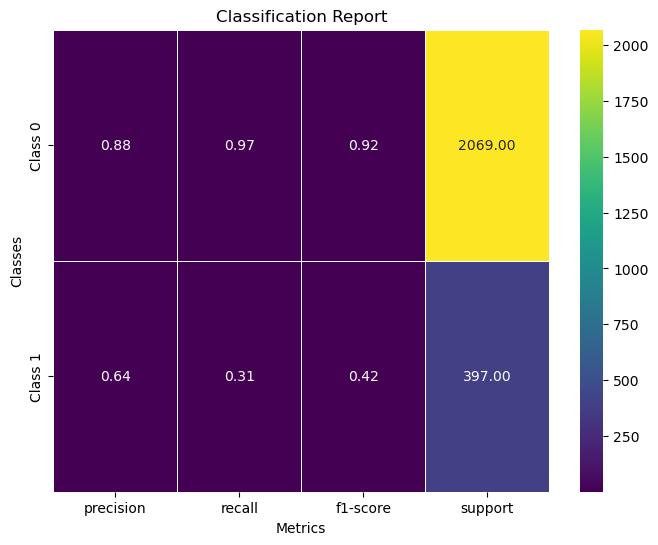

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the classification report as a dictionary
report = {
    'precision': [0.88, 0.64],
    'recall': [0.97, 0.31],
    'f1-score': [0.92, 0.42],
    'support': [2069, 397]
}

# Convert the dictionary to a pandas DataFrame
df_report = pd.DataFrame(report, index=['Class 0', 'Class 1'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


#### Simple Hill Climbing Technique

In [153]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Assuming your dataset is named "fake_online_shoppers"

# Select the features and target variable
features = fake_online_shoppers.drop('Revenue', axis=1)
target = fake_online_shoppers['Revenue']

# Perform one-hot encoding on the categorical variables
features_encoded = pd.get_dummies(features)

# Shuffle the column indices
col_num = len(features_encoded.columns)
col_Ind_Random = shuffle(range(col_num), random_state=1)

# Initialize variables
new_Ind = []
cur_MaxScore = 0.0

# Iterate through each feature
for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_encoded.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
    clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.842051905920519
Score with 2 selected features: 0.842051905920519
Score with 3 selected features: 0.842051905920519
Score with 4 selected features: 0.842051905920519
Score with 5 selected features: 0.842051905920519
Score with 6 selected features: 0.842051905920519
Score with 7 selected features: 0.842051905920519
Score with 8 selected features: 0.842051905920519
Score with 9 selected features: 0.842051905920519
Score with 10 selected features: 0.842051905920519
Score with 11 selected features: 0.842051905920519
Score with 12 selected features: 0.842051905920519
Score with 13 selected features: 0.842051905920519
Score with 14 selected features: 0.8757096512570965
Score with 15 selected features: 0.8838199513381995


#### The results indicate that initially adding more features does not improve the model's performance, as the accuracy remains constant. However, when 14 features are selected, the accuracy improves, and there is a further slight increase when 15 features are included. Beyond that, there is no significant improvement. These results suggest that including at least 14 features benefits the model's accuracy, but the performance may vary with different datasets and models. It's important to note that the simple hill climbing technique used here may not always provide the optimal feature set.

### Model 2: Decision Tree

#### Simple-Hill Climbing technique

In [182]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Assuming your dataset is named "fake_online_shoppers"

# Select the features and target variable
features = fake_online_shoppers.drop('Revenue', axis=1)
target = fake_online_shoppers['Revenue']

# Perform one-hot encoding on the categorical variables
features_encoded = pd.get_dummies(features)

# Shuffle the column indices
col_num = len(features_encoded.columns)
col_Ind_Random = shuffle(range(col_num), random_state=1)

# Initialize variables
new_Ind = []
cur_MaxScore = 0.0

# Iterate through each feature
for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_encoded.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
    clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.842051905920519
Score with 2 selected features: 0.842051905920519
Score with 3 selected features: 0.842051905920519
Score with 4 selected features: 0.842051905920519
Score with 5 selected features: 0.842051905920519
Score with 6 selected features: 0.842051905920519
Score with 7 selected features: 0.842051905920519
Score with 8 selected features: 0.842051905920519
Score with 9 selected features: 0.842051905920519
Score with 10 selected features: 0.842051905920519
Score with 11 selected features: 0.842051905920519
Score with 12 selected features: 0.842051905920519
Score with 13 selected features: 0.842051905920519
Score with 14 selected features: 0.8757096512570965
Score with 15 selected features: 0.8838199513381995


### Generating Train/Test Set

In [156]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
features = fake_online_shoppers.drop('Revenue', axis=1)
target = fake_online_shoppers['Revenue']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=0)


In [161]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Columns to encode
columns_to_encode = ['Region', 'Browser', 'TrafficType', 'VisitorType', 'Month', 'OperatingSystems']

# Perform one-hot encoding on categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[columns_to_encode])
X_test_encoded = encoder.transform(X_test[columns_to_encode])

# Convert encoded arrays back to DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names(columns_to_encode))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names(columns_to_encode))

# Concatenate encoded features with the remaining numerical features
X_train_encoded_df = pd.concat([X_train_encoded_df, X_train.drop(columns=columns_to_encode)], axis=1)
X_test_encoded_df = pd.concat([X_test_encoded_df, X_test.drop(columns=columns_to_encode)], axis=1)

# Handle missing values by imputing or dropping
# For example, to drop rows with missing values:
X_train_encoded_df = X_train_encoded_df.dropna()
y_train = y_train[X_train_encoded_df.index]
X_test_encoded_df = X_test_encoded_df.dropna()
y_test = y_test[X_test_encoded_df.index]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded_df)
X_test_scaled = scaler.transform(X_test_encoded_df)

# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model on the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

y_pred


array([0, 0, 0, ..., 0, 0, 0])

#### Confusion Matrix

In [162]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1688   74]
 [  81  125]]


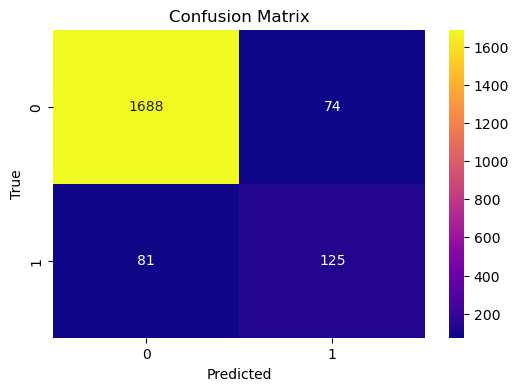

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Create a heatmap of the confusion matrix with 'viridis' colormap
sns.heatmap(cm, annot=True, cmap='plasma', fmt='d', ax=ax)

# Set the title
ax.set_title('Confusion Matrix')

# Set the axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

# Display the graph
plt.show()


#### Classification Report

In [163]:
#Classifcation Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1762
           1       0.63      0.61      0.62       206

    accuracy                           0.92      1968
   macro avg       0.79      0.78      0.79      1968
weighted avg       0.92      0.92      0.92      1968



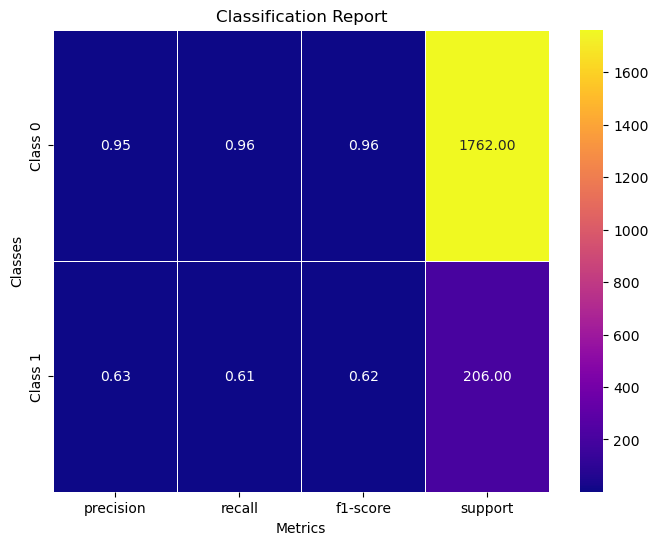

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the classification report as a dictionary
report = {
    'precision': [0.95, 0.63],
    'recall': [0.96, 0.61],
    'f1-score': [0.96, 0.62],
    'support': [1762, 206]
}

# Convert the dictionary to a pandas DataFrame
df_report = pd.DataFrame(report, index=['Class 0', 'Class 1'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


### Tree Visualization

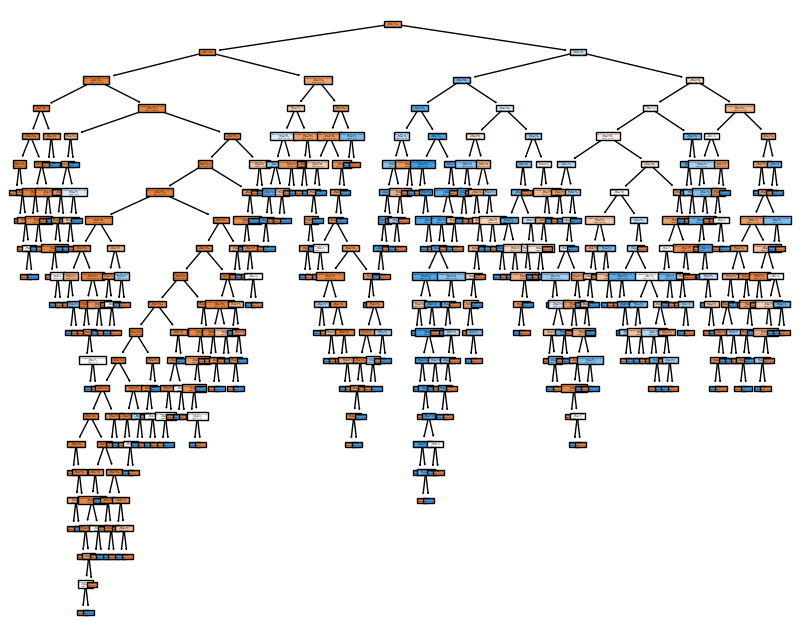

In [170]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model on the training data
clf.fit(X_train_encoded_df, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=X_train_encoded_df.columns)
plt.show()


## Model Validation

### Compare two model performance

### Select Final Model

#### After comparing the two models, we find out that the Decision Tree model performs better in predicting customer online purchases compared to the KNN model. It has higher precision, recall, and f1-scores for both classes and a higher overall accuracy. We can focus on the Decision Tree algorithms and tune its hyperparameters to achive the best results

## Reference

#### Bibor, S. (2021). "How to Create a Seaborn Correlation Heatmap in Python." Medium. Available at: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e.

#### Python Graph Gallery. (n.d.). "Density Plot of Several Variables." Available at: https://www.python-graph-gallery.com/74-density-plot-of-several-variables.

#### Sharma, A. (2022). "Pandas Resample Tricks You Should Know for Manipulating Time Series Data." Towards Data Science. Available at: https://towardsdatascience.com/pandas-resample-tricks-you-should-know-for-manipulating-time-series-data-7e9643a7e7f3.

#### Nikolov, B. (2023). "The Role of Resampling Techniques in Data Science." KDnuggets. Available at: https://www.kdnuggets.com/2023/02/role-resampling-techniques-data-science.html.

#### Stack Overflow. (2020). "Can someone explain to me how MinMaxScaler works?" Available at: https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works.